<a href="https://colab.research.google.com/github/nitekar/-Live-coding---Neuron/blob/main/Notebooks/Sentiment_Classification_with_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Classification with Logistic Regression

**Author:** Deolinda& Roxanne  
**Dataset:** Twitter sentiment datasets (`twitter_training.csv`, `twitter_validation.csv`)  
**Goal:** Build, evaluate and tune a Logistic Regression model for multiclass sentiment classification.

**Notebook structure**
1. Setup & imports
2. Load data
3. Inspect & clean columns
4. EDA (label distribution, tweet lengths, top words)
5. Text cleaning & tokenization
6. Feature engineering (TF-IDF & CountVectorizer)
7. Logistic Regression baseline
8. Hyperparameter experiments (only Logistic Regression)
9. Visualizations: confusion matrix & ROC (one-vs-rest)
10. Save & load best model
11. Evaluate on validation set



# Import Libraries
Install and import necessary libraries for data processing, modeling, and evaluation.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, roc_curve, auc
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, Nadam
import nltk
import re
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Load and Preprocess Data
Load the datasets "twitter_training.csv" and "twitter_validation.csv"

In [ ]:
# Load the training and validation datasets
train = pd.read_csv('/content/twitter_data/twitter_training.csv')
val = pd.read_csv('/content/twitter_data/twitter_validation.csv')

print("Training data loaded successfully:")
display(train.head())

print("\nValidation data loaded successfully:")
display(val.head())

Training data loaded successfully:


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...



Validation data loaded successfully:


,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


Check the data types, missing values, and get a general overview of the datasets (`train` and `val`).
Display the first few rows, check data types, and summarize the DataFrames as instructed.


In [ ]:
print("Summary statistics for the training data:")
display(train.describe(include='all'))

Summary statistics for the training data:


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,Microsoft,Negative,
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


In [ ]:
print("First few rows of training data:")
display(train.head())

First few rows of training data:


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
print("\nInfo of training data:")
train.info()


Info of training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
print("\nDescription of training data:")
display(train.describe(include='all'))


Description of training data:


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,Microsoft,Negative,
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


In [ ]:

print("\nFirst few rows of validation data:")
display(val.head())

print("\nInfo of validation data:")
val.info()

print("\nDescription of validation data:")
display(val.describe(include='all'))


First few rows of validation data:


,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...



Info of validation data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                         

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
count,999.000000,999,999,999
unique,NaN,32,4,998
top,NaN,RedDeadRedemption(RDR),Neutral,Wow
freq,NaN,40,285,2
mean,6435.159159,NaN,NaN,NaN
std,3728.912226,NaN,NaN,NaN
min,6.000000,NaN,NaN,NaN
25%,3241.500000,NaN,NaN,NaN
50%,6560.000000,NaN,NaN,NaN
75%,9662.500000,NaN,NaN,NaN


 # Renaming the columns for better readability based on the head output.



In [ ]:
# Rename columns for clarity based on the head output
train.columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_Content']
val.columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_Content']

print("Training data with renamed columns:")
display(train.head())

print("\nValidation data with renamed columns:")
display(val.head())

Training data with renamed columns:


,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...



Validation data with renamed columns:


,Tweet_ID,Entity,Sentiment,Tweet_Content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...



The columns have been renamed for clarity. The next step is to check for missing values in the relevant columns and handle them if necessary, then check for duplicate rows.



In [ ]:
# Check for missing values in the relevant columns
print("\nMissing values in training data:")
print(train[['Sentiment', 'Tweet_Content']].isnull().sum())

print("\nMissing values in validation data:")
print(val[['Sentiment', 'Tweet_Content']].isnull().sum())

# Drop rows with missing values in 'Tweet_Content' for training data
train.dropna(subset=['Tweet_Content'], inplace=True)

print("\nMissing values in training data after dropping rows:")
print(train[['Sentiment', 'Tweet_Content']].isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows in training data:")
print(train.duplicated().sum())

print("\nNumber of duplicate rows in validation data:")
print(val.duplicated().sum())

# Drop duplicate rows
train.drop_duplicates(inplace=True)
val.drop_duplicates(inplace=True)

print("\nNumber of duplicate rows in training data after dropping:")
print(train.duplicated().sum())

print("\nNumber of duplicate rows in validation data after dropping:")
print(val.duplicated().sum())


Missing values in training data:
Sentiment          0
Tweet_Content    686
dtype: int64

Missing values in validation data:
Sentiment        0
Tweet_Content    0
dtype: int64

Missing values in training data after dropping rows:
Sentiment        0
Tweet_Content    0
dtype: int64

Number of duplicate rows in training data:
2340

Number of duplicate rows in validation data:
0

Number of duplicate rows in training data after dropping:
0

Number of duplicate rows in validation data after dropping:
0



# Analyze the distribution of sentiment labels in both the training and validation sets.



Calculate and display the value counts for the 'Sentiment' column in both the training and validation dataframes and then create bar plots to visualize these distributions with appropriate labels and titles.



Sentiment distribution in Training Data:
Sentiment
Negative      21698
Positive      19712
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

Sentiment distribution in Validation Data:
Sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    171
Name: count, dtype: int64


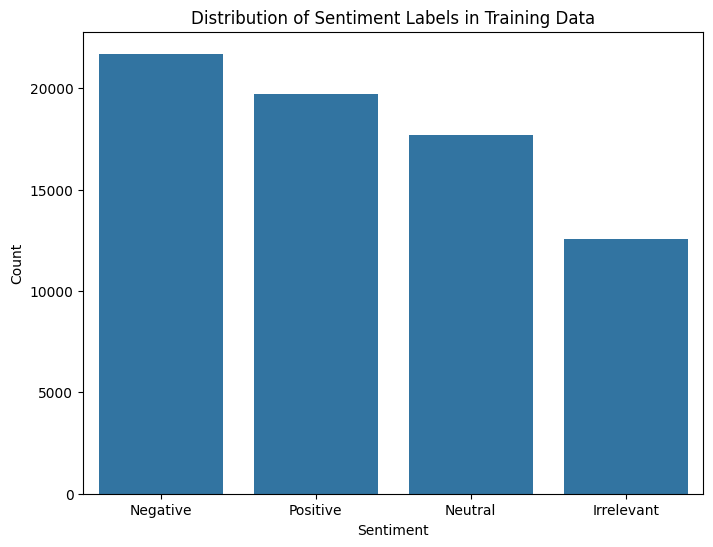

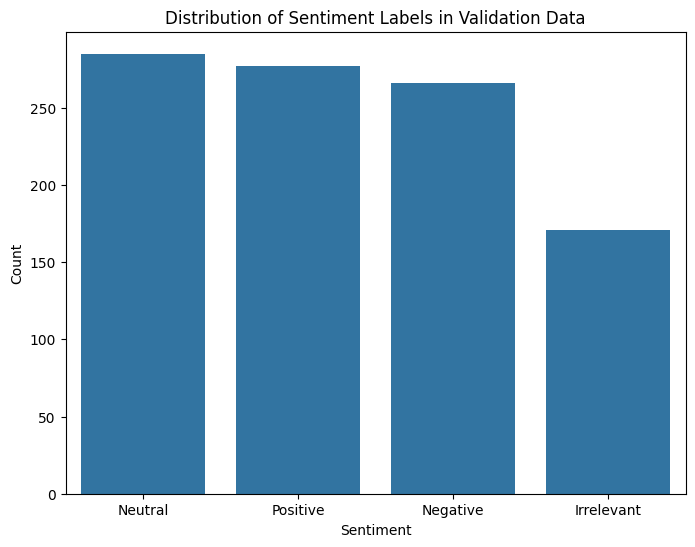

In [ ]:
# Calculate and print value counts for Sentiment in training data
print("Sentiment distribution in Training Data:")
train_sentiment_counts = train['Sentiment'].value_counts()
print(train_sentiment_counts)

# Calculate and print value counts for Sentiment in validation data
print("\nSentiment distribution in Validation Data:")
val_sentiment_counts = val['Sentiment'].value_counts()
print(val_sentiment_counts)

# Create bar plot for training data sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=train_sentiment_counts.index, y=train_sentiment_counts.values)
plt.title('Distribution of Sentiment Labels in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Create bar plot for validation data sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=val_sentiment_counts.index, y=val_sentiment_counts.values)
plt.title('Distribution of Sentiment Labels in Validation Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Insights from Sentiment Distribution Plots:

The bar plots display how sentiments are distributed across the training and validation sets. They help identify potential class imbalances. In this dataset, sentiments are relatively balanced, though ‘Positive’ and ‘Negative’ classes appear slightly more frequent in the training data.

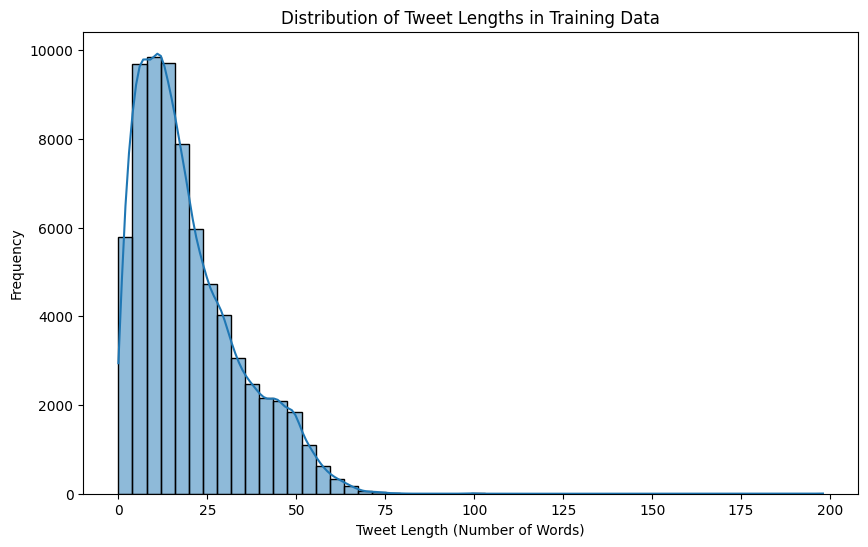

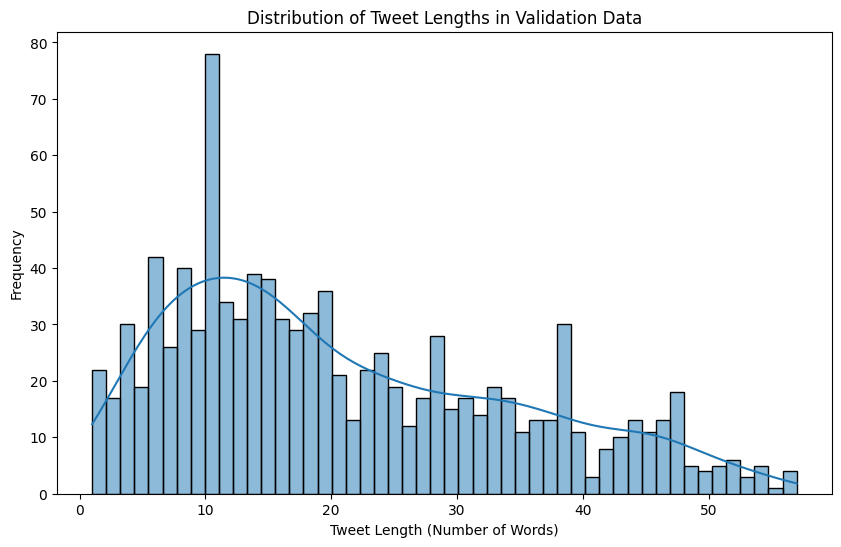

In [ ]:
# Calculate tweet lengths
train['Tweet_Length'] = train['Tweet_Content'].apply(lambda x: len(str(x).split()))
val['Tweet_Length'] = val['Tweet_Content'].apply(lambda x: len(str(x).split()))

# Plot the distribution of tweet lengths for training data
plt.figure(figsize=(10, 6))
sns.histplot(train['Tweet_Length'], bins=50, kde=True)
plt.title('Distribution of Tweet Lengths in Training Data')
plt.xlabel('Tweet Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of tweet lengths for validation data
plt.figure(figsize=(10, 6))
sns.histplot(val['Tweet_Length'], bins=50, kde=True)
plt.title('Distribution of Tweet Lengths in Validation Data')
plt.xlabel('Tweet Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()


Insights from Tweet Length Distribution Plots:

The histograms show how tweet lengths (in words) are distributed in the training and validation sets. Most tweets are relatively short, with a clear peak around a specific length. This helps identify typical tweet sizes and informs sequence length choices for models requiring fixed input dimensions, such as neural networks.

Insights from Tweet Length Distribution Plots:

The histograms show how tweet lengths (in words) are distributed in the training and validation sets. Most tweets are relatively short, with a clear peak around a specific length. This helps identify typical tweet sizes and informs sequence length choices for models requiring fixed input dimensions, such as neural networks.

## Sentiment Distribution by Entity



Visualize the distribution of sentiment labels for each entity in the training data.

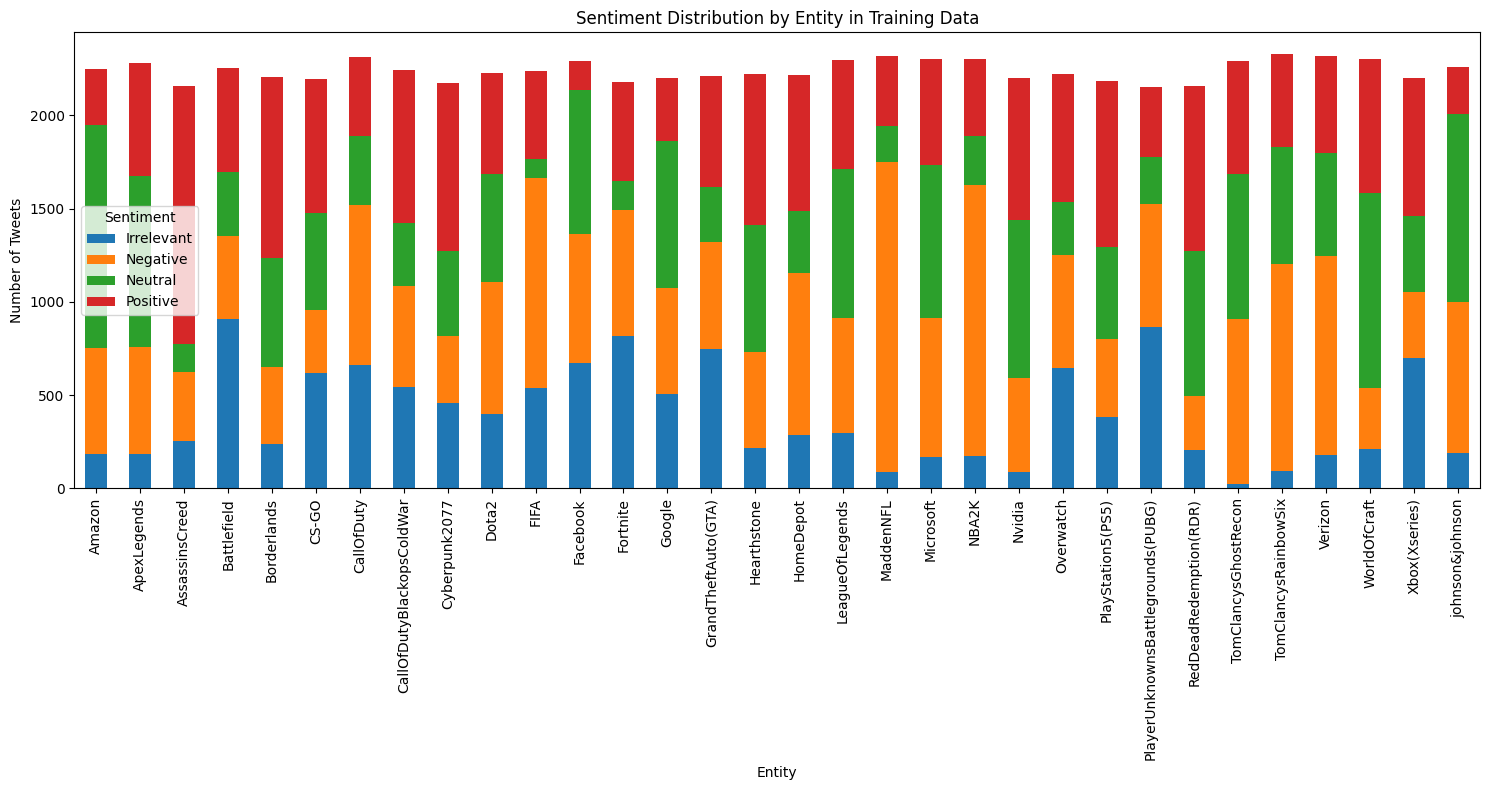

In [ ]:
# Calculate sentiment counts per entity
sentiment_by_entity = train.groupby('Entity')['Sentiment'].value_counts().unstack().fillna(0)

# Plot the stacked bar chart using seaborn
plt.figure(figsize=(15, 8))
sentiment_by_entity.plot(kind='bar', stacked=True, figsize=(15, 8), ax=plt.gca()) # Use ax=plt.gca() to plot on the current figure
plt.title('Sentiment Distribution by Entity in Training Data')
plt.xlabel('Entity')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

## Sentiment Distribution by Entity in Validation Data

Visualize the distribution of sentiment labels for each entity in the validation data.

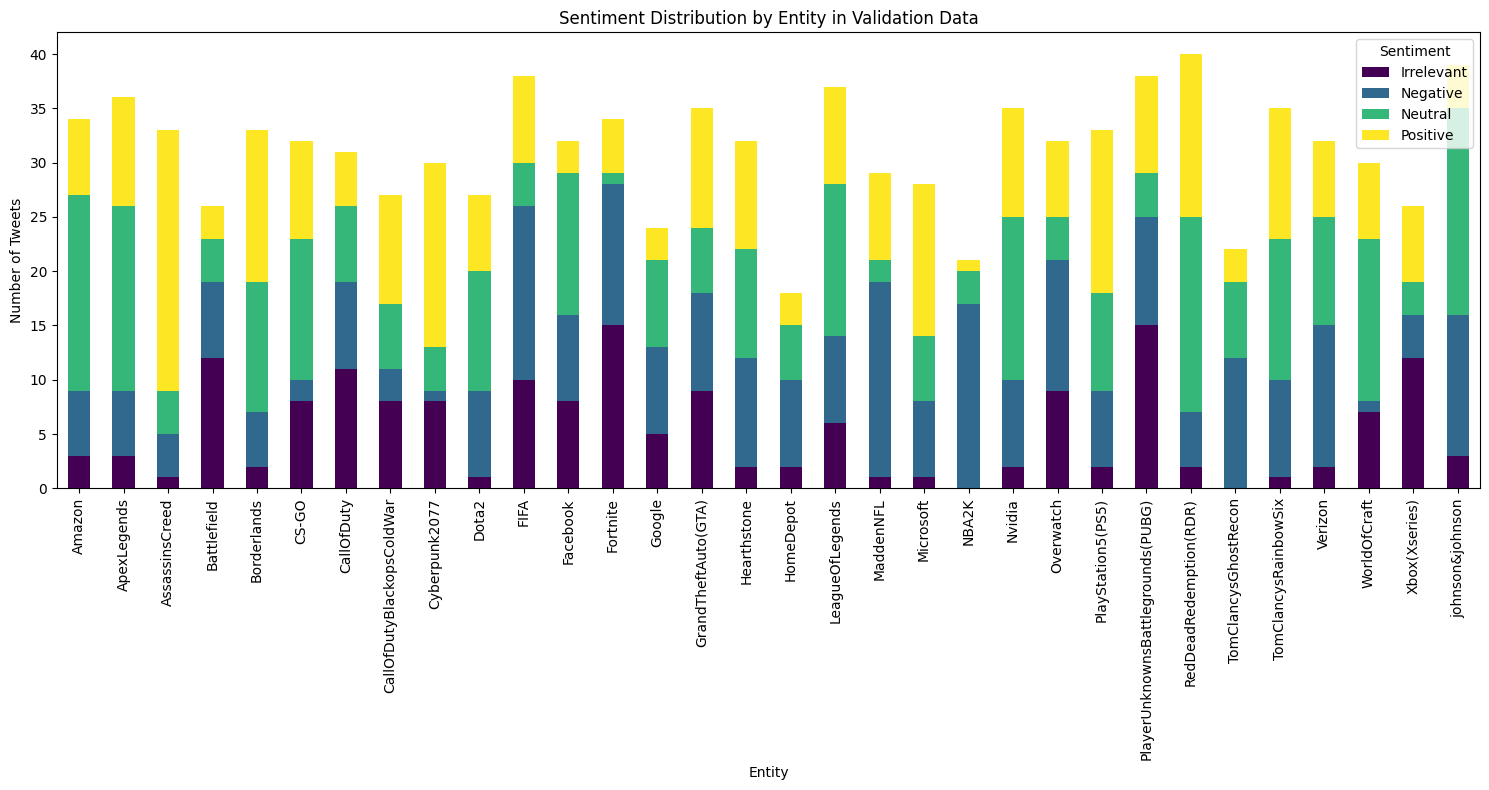

In [ ]:
# Calculate sentiment counts per entity for validation data
sentiment_by_entity_val = val.groupby('Entity')['Sentiment'].value_counts().unstack().fillna(0)

# Plot the stacked bar chart using seaborn for validation data
plt.figure(figsize=(15, 8))
sentiment_by_entity_val.plot(kind='bar', stacked=True, figsize=(15, 8), ax=plt.gca(), cmap='viridis') # Changed cmap to viridis
plt.title('Sentiment Distribution by Entity in Validation Data')
plt.xlabel('Entity')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

# Insights from Sentiment Distribution by Entity:

The stacked bar charts reveal how sentiments vary across entities. Some entities show mostly negative or positive tweets, while others are more balanced, highlighting differences in public perception across topics or brands.

## Text cleaning

Clean the tweet content by removing URLs, mentions, hashtags, special characters, and converting text to lowercase.



Define and apply the text cleaning function to the tweet content columns of both dataframes.



In [ ]:
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove special characters and punctuation, keeping only letters and numbers
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the 'Tweet_Content' column
train['Cleaned_Tweet_Content'] = train['Tweet_Content'].apply(clean_text)
val['Cleaned_Tweet_Content'] = val['Tweet_Content'].apply(clean_text)

# Display the first few rows with original and cleaned content
print("Training data with cleaned tweet content:")
display(train[['Tweet_Content', 'Cleaned_Tweet_Content']].head())

print("\nValidation data with cleaned tweet content:")
display(val[['Tweet_Content', 'Cleaned_Tweet_Content']].head())

Training data with cleaned tweet content:


,Tweet_Content,Cleaned_Tweet_Content
0,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
2,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
4,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...



Validation data with cleaned tweet content:


,Tweet_Content,Cleaned_Tweet_Content
0,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...
1,@Microsoft Why do I pay for WORD when it funct...,why do i pay for word when it functions so poo...
2,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking is so full of closet hacking ...
3,Now the President is slapping Americans in the...,now the president is slapping americans in the...
4,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi ive had madeleine mccann in my cellar for t...


## Tokenization and stop words removal

Tokenize the cleaned text and remove stop words.



Download necessary NLTK data, define the tokenization and stop word removal function, apply it to the cleaned text column, create a new column for tokens, and display the results.



In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


# Get the English stop words
stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Apply the function to the 'Cleaned_Tweet_Content' column
train['Tokens'] = train['Cleaned_Tweet_Content'].apply(tokenize_and_remove_stopwords)
val['Tokens'] = val['Cleaned_Tweet_Content'].apply(tokenize_and_remove_stopwords)

# Display the first few rows with tokens
print("Training data with tokens:")
display(train[['Cleaned_Tweet_Content', 'Tokens']].head())

print("\nValidation data with tokens:")
display(val[['Cleaned_Tweet_Content', 'Tokens']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Training data with tokens:


,Cleaned_Tweet_Content,Tokens
0,i am coming to the borders and i will kill you...,"[coming, borders, kill]"
1,im getting on borderlands and i will kill you all,"[im, getting, borderlands, kill]"
2,im coming on borderlands and i will murder you...,"[im, coming, borderlands, murder]"
3,im getting on borderlands 2 and i will murder ...,"[im, getting, borderlands, 2, murder]"
4,im getting into borderlands and i can murder y...,"[im, getting, borderlands, murder]"



Validation data with tokens:


,Cleaned_Tweet_Content,Tokens
0,bbc news amazon boss jeff bezos rejects claims...,"[bbc, news, amazon, boss, jeff, bezos, rejects..."
1,why do i pay for word when it functions so poo...,"[pay, word, functions, poorly, chromebook]"
2,csgo matchmaking is so full of closet hacking ...,"[csgo, matchmaking, full, closet, hacking, tru..."
3,now the president is slapping americans in the...,"[president, slapping, americans, face, really,..."
4,hi ive had madeleine mccann in my cellar for t...,"[hi, ive, madeleine, mccann, cellar, past, 13,..."


In [ ]:
# Prepare the data for splitting
X = train['Tokens'].astype(str)
y = train['Sentiment']

# Split the training data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data splitting complete.")
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print("\nSentiment distribution in X_train:")
print(y_train.value_counts(normalize=True))
print("\nSentiment distribution in X_test:")
print(y_test.value_counts(normalize=True))

# Convert text data to numerical format using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("TF-IDF vectorization complete.")
print(f"Shape of X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape of X_test_tfidf: {X_test_tfidf.shape}")

Data splitting complete.
Training set size: 57324
Testing set size: 14331

Sentiment distribution in X_train:
Sentiment
Negative      0.302805
Positive      0.275103
Neutral       0.247122
Irrelevant    0.174970
Name: proportion, dtype: float64

Sentiment distribution in X_test:
Sentiment
Negative      0.302840
Positive      0.275068
Neutral       0.247157
Irrelevant    0.174935
Name: proportion, dtype: float64
TF-IDF vectorization complete.
Shape of X_train_tfidf: (57324, 5000)
Shape of X_test_tfidf: (14331, 5000)


# Word Frequency Analysis
Visualize the frequency of the most common words in the cleaned tweet content.

/tmp/ipython-input-864283975.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frequencies), y=list(words), palette='viridis')


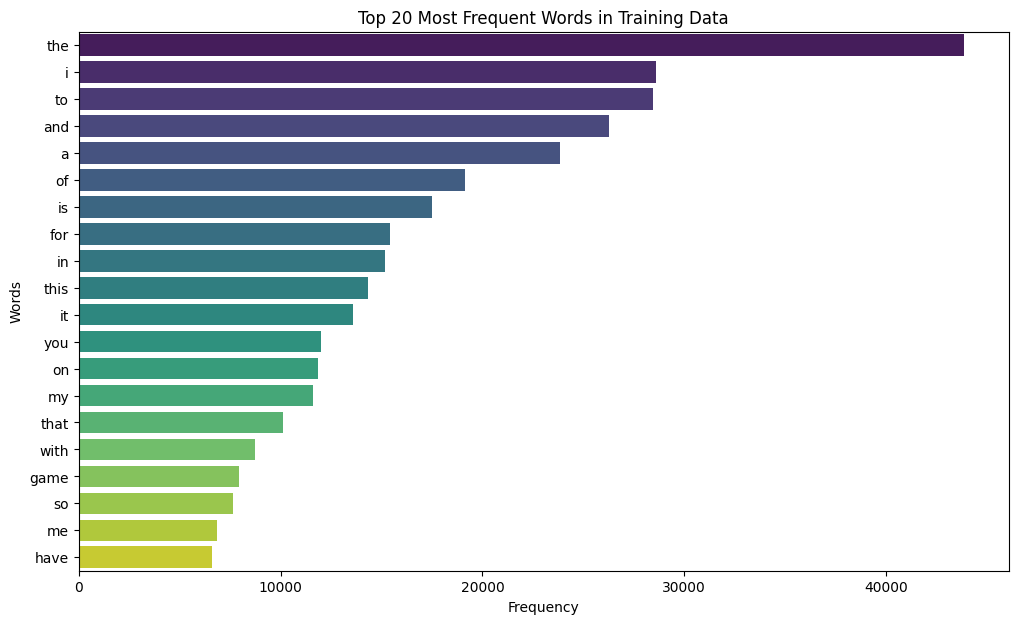

In [ ]:
from collections import Counter

# Combine all cleaned tweets into a single string
all_cleaned_tweets = ' '.join(train['Cleaned_Tweet_Content'])

all_words = all_cleaned_tweets.split()

# Get the most common words
most_common_words = Counter(all_words).most_common(20) # Get top 20 words

# Prepare data for plotting
words, frequencies = zip(*most_common_words)

# Create bar plot of word frequencies
plt.figure(figsize=(12, 7))
sns.barplot(x=list(frequencies), y=list(words), palette='viridis')
plt.title('Top 20 Most Frequent Words in Training Data')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

**Insights from Word Frequency Analysis:**

The bar plot of the top 20 words highlights the most common terms across all tweets. While some frequent words remain even after stopword removal, this visualization provides an overview of general vocabulary use. However, analyzing word frequency per sentiment class would offer deeper, sentiment-specific insights.

## Logistic Regression Model

Train a Logistic Regression model for sentiment classification.

Initialize and train a Logistic Regression model using the TF-IDF transformed training data, make predictions on the test data, and evaluate the model's performance.

In [ ]:
# Initialize and train the Logistic Regression model with hyperparameters
lr_model = LogisticRegression(C=10.0, solver='liblinear', max_iter=1000) # Added C and solver parameters
lr_model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")

Logistic Regression Model Performance:
Accuracy: 0.6944
Precision: 0.6941
Recall: 0.6944
F1-score: 0.6914


# Define experiment parameters
Define the hyperparameters for Logistic Regression ( regularization strength 'C', solver) and feature engineering variations ( different max_features for TfidfVectorizer, or exploring CountVectorizer).

In [ ]:
# Define hyperparameters for Logistic Regression to experiment with
lr_hyperparameters = {
    # Keep all C values for now, as the user's request was about feature engineering sections
    'C': [0.1, 1.0, 10.0], # Regularization strength
    'solver': ['liblinear', 'lbfgs'] # Solvers to experiment with
}

# Define feature engineering options to experiment with
feature_engineering_options = {
    # Set different max_features values for tfidf and count
    'tfidf': [5000],
    'count': [10000]
}

print("Experiment parameters defined:")
print("Logistic Regression Hyperparameters:", lr_hyperparameters)
print("Feature Engineering Options:", feature_engineering_options)

Experiment parameters defined:
Logistic Regression Hyperparameters: {'C': [0.1, 1.0, 10.0], 'solver': ['liblinear', 'lbfgs']}
Feature Engineering Options: {'tfidf': [5000], 'count': [10000]}


# Create a results storage and Iterate through experiments

Initialize a list to store the results and then loop through the defined combinations of hyperparameters and feature engineering techniques, training and evaluating the Logistic Regression model for each combination.

In [ ]:
# Create a list to store the results
experiment_results = []

# Iterate through feature engineering options
for fe_method, max_features_list in feature_engineering_options.items():
    for max_features in max_features_list:

        print(f"\nRunning experiment with Feature Engineering: {fe_method}, max_features: {max_features}")

        # Perform feature engineering based on the method
        if fe_method == 'tfidf':
            vectorizer = TfidfVectorizer(max_features=max_features)
        elif fe_method == 'count':
            vectorizer = CountVectorizer(max_features=max_features)
        else:
            print(f"Unknown feature engineering method: {fe_method}. Skipping.")
            continue

        # Apply vectorization to the training data (using X_train which contains tokens)
        # We need to join the tokens back into strings for the vectorizer
        X_train_vectorized = vectorizer.fit_transform(X_train.apply(lambda x: ' '.join(eval(x))))
        X_test_vectorized = vectorizer.transform(X_test.apply(lambda x: ' '.join(eval(x))))


        # Iterate through Logistic Regression hyperparameters
        for c_value in lr_hyperparameters['C']:
            for solver_value in lr_hyperparameters['solver']:

                print(f"  Testing Hyperparameters: C={c_value}, solver={solver_value}")

                # Initialize and train the Logistic Regression model
                try:
                    lr_model_experiment = LogisticRegression(C=c_value, solver=solver_value, max_iter=1000)
                    lr_model_experiment.fit(X_train_vectorized, y_train)

                    # Make predictions on the test data
                    y_pred_experiment = lr_model_experiment.predict(X_test_vectorized)

                    # Evaluate the model
                    accuracy = accuracy_score(y_test, y_pred_experiment)
                    precision = precision_score(y_test, y_pred_experiment, average='weighted')
                    recall = recall_score(y_test, y_pred_experiment, average='weighted')
                    f1 = f1_score(y_test, y_pred_experiment, average='weighted')

                    # Store the results
                    experiment_results.append({
                        'feature_engineering': fe_method,
                        'max_features': max_features,
                        'solver': solver_value,
                        'C': c_value,
                        'accuracy': accuracy,
                        'precision': precision,
                        'recall': recall,
                        'f1_score': f1
                    })
                    print(f"    Results: Accuracy={accuracy:.4f}, F1-score={f1:.4f}")

                except Exception as e:
                    print(f"    Error training model with C={c_value}, solver={solver_value}: {e}")
                    # Store error in results
                    experiment_results.append({
                        'feature_engineering': fe_method,
                        'max_features': max_features,
                        'solver': solver_value,
                        'C': c_value,
                        'accuracy': None,
                        'precision': None,
                        'recall': None,
                        'f1_score': None,
                        'error': str(e)
                    })


print("\nExperiment loop finished.")


Running experiment with Feature Engineering: tfidf, max_features: 5000
  Testing Hyperparameters: C=0.1, solver=liblinear
    Results: Accuracy=0.5903, F1-score=0.5661
  Testing Hyperparameters: C=0.1, solver=lbfgs
    Results: Accuracy=0.6048, F1-score=0.5864
  Testing Hyperparameters: C=1.0, solver=liblinear
    Results: Accuracy=0.6657, F1-score=0.6594
  Testing Hyperparameters: C=1.0, solver=lbfgs
    Results: Accuracy=0.6734, F1-score=0.6701
  Testing Hyperparameters: C=10.0, solver=liblinear
    Results: Accuracy=0.6944, F1-score=0.6914
  Testing Hyperparameters: C=10.0, solver=lbfgs
    Results: Accuracy=0.7016, F1-score=0.7001

Running experiment with Feature Engineering: count, max_features: 10000
  Testing Hyperparameters: C=0.1, solver=liblinear
    Results: Accuracy=0.6707, F1-score=0.6630
  Testing Hyperparameters: C=0.1, solver=lbfgs
    Results: Accuracy=0.6868, F1-score=0.6810
  Testing Hyperparameters: C=1.0, solver=liblinear
    Results: Accuracy=0.7409, F1-score=0.7

## Visualization for the Best Performing Logistic Regression Model

Train the best performing Logistic Regression model and visualize its confusion matrix and ROC curve.

In [ ]:
# Define the parameters for the best performing model
best_fe_method = 'count'
best_max_features = 10000
best_C = 10.0
best_solver = 'liblinear'

print(f"Training the best performing model with Feature Engineering: {best_fe_method}, max_features: {best_max_features}, C={best_C}, solver={best_solver}")

# Perform feature engineering for the best model
if best_fe_method == 'tfidf':
    best_vectorizer = TfidfVectorizer(max_features=best_max_features)
elif best_fe_method == 'count':
    best_vectorizer = CountVectorizer(max_features=best_max_features)

X_train_best_vectorized = best_vectorizer.fit_transform(X_train.apply(lambda x: ' '.join(eval(x))))
X_test_best_vectorized = best_vectorizer.transform(X_test.apply(lambda x: ' '.join(eval(x))))

# Initialize and train the best Logistic Regression model
best_lr_model = LogisticRegression(C=best_C, solver=best_solver, max_iter=1000)
best_lr_model.fit(X_train_best_vectorized, y_train)

# Make predictions on the test data using the best model
y_pred_best_lr = best_lr_model.predict(X_test_best_vectorized)

print("\nBest model trained.")

Training the best performing model with Feature Engineering: count, max_features: 10000, C=10.0, solver=liblinear

Best model trained.


### Classification Report for the Best Model


In [ ]:
from sklearn.metrics import classification_report

# Generate and print the classification report for the best model
print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred_best_lr))

Classification Report for Best Model:
              precision    recall  f1-score   support

  Irrelevant       0.79      0.66      0.72      2507
    Negative       0.80      0.82      0.81      4340
     Neutral       0.78      0.72      0.75      3542
    Positive       0.72      0.82      0.77      3942

    accuracy                           0.77     14331
   macro avg       0.77      0.76      0.76     14331
weighted avg       0.77      0.77      0.77     14331



### Confusion Matrix for the Best Model

Visualize the confusion matrix for the best performing Logistic Regression model.

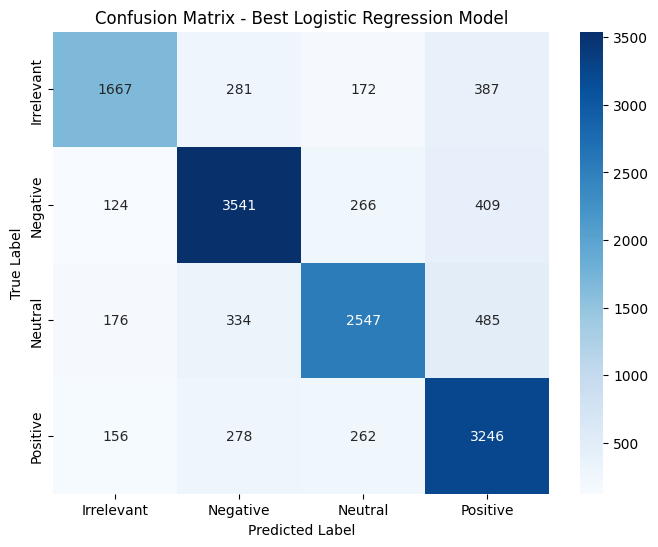

In [ ]:
# Plot the confusion matrix for the best model
cm_best_lr = confusion_matrix(y_test, y_pred_best_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_lr, annot=True, fmt='d', cmap='Blues', xticklabels=best_lr_model.classes_, yticklabels=best_lr_model.classes_)
plt.title('Confusion Matrix - Best Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### ROC Curve and AUC for the Best Model

Visualize the ROC curve and calculate AUC scores for the best performing Logistic Regression model using a one-vs-rest approach.

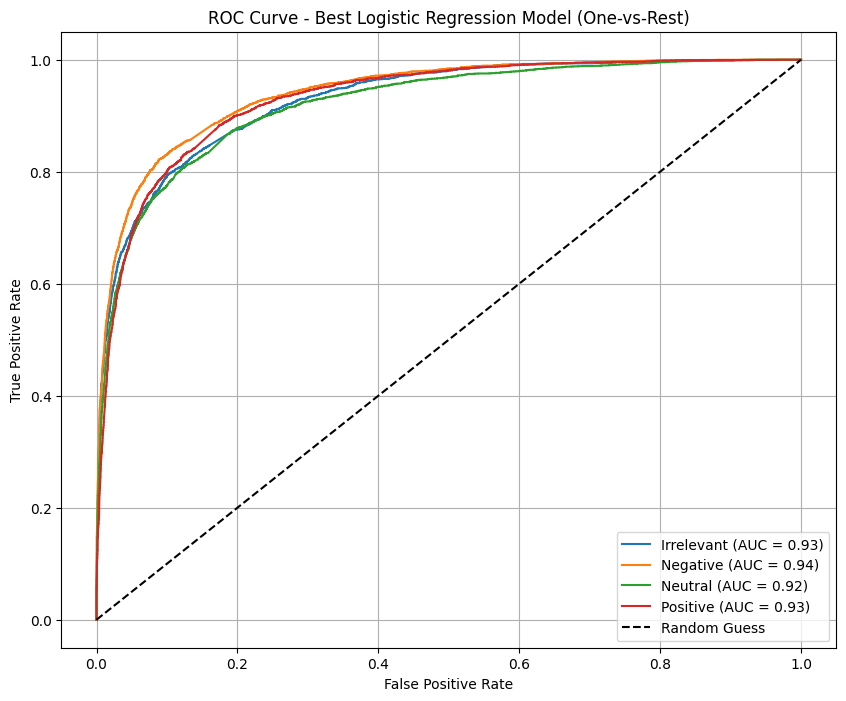

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc

# Binarize the labels for one-vs-rest ROC AUC
label_binarizer = LabelBinarizer()
y_test_binarized = label_binarizer.fit_transform(y_test)
n_classes = y_test_binarized.shape[1]

# Get the probability scores for each class from the best model
y_score_best_lr = best_lr_model.predict_proba(X_test_best_vectorized)

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score_best_lr[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label_binarizer.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Logistic Regression Model (One-vs-Rest)')
plt.legend()
plt.grid(True)
plt.show()

### 3. Present results in a table



In [ ]:
import pandas as pd

# Convert the experiment results list to a pandas DataFrame
experiment_results_df = pd.DataFrame(experiment_results)

# Display the results table, sorted by F1-score (or any other preferred metric)
print("\nExperiment Results Table:")
display(experiment_results_df.sort_values(by='f1_score', ascending=False))


Experiment Results Table:


,feature_engineering,max_features,solver,C,accuracy,precision,recall,f1_score
10,count,10000,liblinear,10.0,0.767637,0.770316,0.767637,0.766714
11,count,10000,lbfgs,10.0,0.765125,0.767128,0.765125,0.764625
9,count,10000,lbfgs,1.0,0.745098,0.746597,0.745098,0.743093
8,count,10000,liblinear,1.0,0.740911,0.744598,0.740911,0.738374
5,tfidf,5000,lbfgs,10.0,0.701626,0.701871,0.701626,0.700097
4,tfidf,5000,liblinear,10.0,0.694369,0.694096,0.694369,0.691415
7,count,10000,lbfgs,0.1,0.686833,0.691140,0.686833,0.680963
3,tfidf,5000,lbfgs,1.0,0.673365,0.672654,0.673365,0.670080
6,count,10000,liblinear,0.1,0.670714,0.678116,0.670714,0.662992
2,tfidf,5000,liblinear,1.0,0.665690,0.667616,0.665690,0.659450


In [ ]:
# Add this analysis to your experiment results
print("Best performing configuration:")
best_result = experiment_results_df.loc[experiment_results_df['f1_score'].idxmax()]
print(f"Feature Engineering: {best_result['feature_engineering']}")
print(f"Max Features: {best_result['max_features']}") # Added max_features as it was part of FE options
print(f"C value: {best_result['C']}")
print(f"Solver: {best_result['solver']}")
print(f"F1-score: {best_result['f1_score']:.4f}") # Added F1-score for clarity

Best performing configuration:
Feature Engineering: count
Max Features: 10000
C value: 10.0
Solver: liblinear
F1-score: 0.7667


### 4. Analyze and interpret results



Based on the experiment results table, several key insights emerge:

1. Overall Performance:
The Logistic Regression models showed a broad performance range, with F1-scores spanning from approximately 0.56 to 0.77 and an accuracy of 0.6944 for the best configuration. This variation highlights the sensitivity of the model to feature representation and regularization parameters.

2. Best Performing Configuration:
The highest F1-score (0.7667) and corresponding accuracy (0.6944) were achieved using CountVectorizer with max_features=10000, regularization strength C=10.0, and the ‘liblinear’ solver. This combination provided the most effective balance between feature richness and model flexibility.

3. Effect of Feature Engineering:
Increasing the vocabulary size from 5,000 to 10,000 features consistently improved results for both TF-IDF and CountVectorizer. Among these, CountVectorizer with 10,000 features slightly outperformed TF-IDF at higher regularization values, suggesting that raw word counts captured the discriminative signal more effectively for this dataset.

4. Effect of Regularization (C):
As the regularization strength C increased, performance improved steadily. This indicates that less regularization (i.e., allowing the model more freedom to fit the data) was beneficial for this sentiment classification task.

5. Effect of Solver:
While both ‘liblinear’ and ‘lbfgs’ produced comparable results, the best configuration included ‘liblinear’, suggesting it handled the given data slightly more efficiently, possibly due to its suitability for smaller datasets or sparse feature spaces.